<a href="https://colab.research.google.com/github/coderTanisha22/Jarvis_learnings/blob/main/Digit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as opt
import torch.nn.functional as tf
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms


In [ ]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
train_set = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)

100%|██████████| 9.91M/9.91M [00:01<00:00, 4.96MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 64.7kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 242kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.74MB/s]


In [ ]:
test_set = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)

In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=32, shuffle=True
)

In [ ]:
test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=32, shuffle=False
)

In [ ]:
#just checking
print(len(train_set))
print(len(test_set))
print(train_loader.dataset[0][0].shape)

60000
10000
torch.Size([1, 28, 28])


In [ ]:
#training data
#fig, axes = plt.subplots(1, 15, figsize=(12, 3))
#for i in range(15):
#    axes[i].imshow(train_loader.dataset[i][0].squeeze(), cmap='gray')
#    axes[i].set_title(train_loader.dataset[i][1])
#    axes[i].axis('off')
#plt.show()

In [ ]:
class SmallerNet(nn.Module):
  def __init__(self):
    super(SmallerNet, self).__init__()
    self.input = nn.Linear(28*28, 64)
    self.hidden = nn.Linear(64, 32)
    self.output= nn.Linear(32, 10)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = tf.relu(self.input(x))
    x = tf.relu(self.hidden(x))
    x= tf.log_softmax(self.output(x), dim=1)
    return x

model= SmallerNet()

training algorithm- backpropagation (adam)

In [ ]:
loss_fn = nn.NLLLoss()
optimizer = opt.Adam(model.parameters(), lr=0.001)


In [ ]:
epochs = 10

for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        output = model(images)
        loss = loss_fn(output, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")


Epoch 1/10, Loss: 783.6525
Epoch 2/10, Loss: 416.1183
Epoch 3/10, Loss: 316.3966
Epoch 4/10, Loss: 258.9166
Epoch 5/10, Loss: 235.3421
Epoch 6/10, Loss: 207.3636
Epoch 7/10, Loss: 198.5741
Epoch 8/10, Loss: 176.9792
Epoch 9/10, Loss: 169.4071
Epoch 10/10, Loss: 157.9548


In [ ]:
correct = 0
total = 0
model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 96.38%


In [ ]:
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
non_trainable_params = sum(p.numel() for p in model.parameters() if not p.requires_grad)

print(f"Trainable Parameters: {trainable_params}")
print(f"Non-trainable Parameters: {non_trainable_params}")

optimizer_state = optimizer.state_dict()
optimizer_param_count = 0

for state in optimizer_state['state'].values():
    for val in state.values():
        optimizer_param_count += val.numel()
print(f"Optimizer Internal Parameters: {optimizer_param_count}")


Trainable Parameters: 52650
Non-trainable Parameters: 0
Optimizer Internal Parameters: 105306


Predicting digits with new image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving digit8clear.png.jpg to digit8clear.png (1).jpg


In [ ]:
from PIL import Image, ImageOps
img = Image.open("digit8clear.png.jpg")

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
img = ImageOps.fit(img, (28, 28), method=Image.BICUBIC)
img_tensor = transform(img).unsqueeze(0)

model.eval()
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)

print(f"Predicted Digit: {predicted.item()}")


Predicted Digit: 8


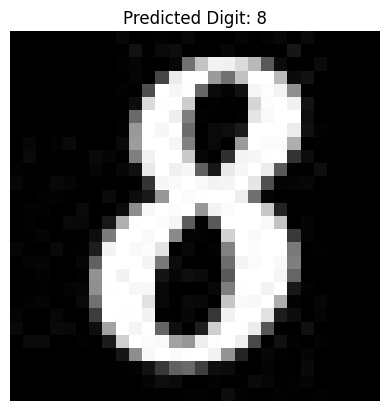

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0][0], cmap='gray')
plt.title(f"Predicted Digit: {predicted.item()}")
plt.axis('off')
plt.show()